In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
a_file = open("2scen60rep.pkl", "rb")
results = pickle.load(a_file)
a_file.close()

In [14]:
from ema_workbench import load_results
results2 = load_results('60rep1pol2scen.gz.tar')

In [15]:
results2

(   ABM_Heat-company-ROI  ABM_Max-capital-inv-share  ABM_Max-income-inv-share  \
 0              0.086175                   0.102344                  0.077054   
 1              0.106988                   0.079226                  0.080877   
 
    ABM_Relative-construction-capacity  ABM_group-behaviour  \
 0                            0.098648             0.282009   
 1                            0.023095             0.776503   
 
   ABM_heating-grid-cost-scenario  SD_Base Investments Renewable  \
 0                          "Low"                       0.076640   
 1                         "High"                       0.041409   
 
    SD_Expected Amplitude  SD_Expected Period  SD_Foreign renewable multiplier  \
 0               0.022158            6.957476                         1.102043   
 1               0.033834            8.295740                         1.311997   
 
    ...  ABM_MT-investment-subsidy  ABM_MT-production-subsidy  \
 0  ...                   0.080967           

In [23]:
def get_replication_discriptives(results, variable, rep_id, tick):
    # source for idea http://jasss.soc.surrey.ac.uk/18/4/4.html
    discriptives = pd.DataFrame()
    for i in range (60):
        discriptives = discriptives.append(pd.DataFrame(results[1][variable][rep_id][:i])[tick].describe().transpose())
    discriptives = discriptives.reset_index(drop = True).dropna()
    discriptives['d'] = discriptives['max'] - discriptives['min']
    discriptives['Cv'] = abs(discriptives['std']/discriptives['mean'])
    discriptives['var'] = discriptives['std']**2
    discriptives['r_var'] = discriptives['var'] / discriptives['var'].max()


    lst = []
    for i in range(len(discriptives['Cv'])-1):
        lst.append(discriptives['Cv'].iloc[i] - discriptives['Cv'].iloc[i+1])
    discriptives['E'] = [0] + lst
    discriptives = discriptives.drop(['25%','50%','75%'], axis =1 )
    return discriptives

In [6]:
no_categorical_results = ['SD_Average Gas Price', 'SD_Average Electricity Price', 'SD_Average Heat Price', 'SD_National Energy System Distribution[Natural Gas]', 'SD_National Energy System Distribution[Green Gas]', 'SD_National Energy System Distribution[LT Heating Grid]', 'SD_National Energy System Distribution[MT Heating Grid]', 'SD_National Energy System Distribution[HT Heating Grid]', 'SD_National Energy System Distribution[Air Heat Pump]', 'SD_National Energy System Distribution[Ground Heat Pump]', 'SD_Cumulative CO2 emmissions', 'SD_Percentage Renewable Electricity', 'SD_CO2 Tax', 'SD_Gas Trade[Natural Gas]', 'SD_Gas Trade[Green Gas]', 'SD_Electricity Trade']

In [7]:
results_squeezed = {k: results[1][k] for k in no_categorical_results}

In [8]:
results = (results[0],results_squeezed)

In [9]:
time = []
for i in range (41):
     time.append(i)

<function matplotlib.pyplot.show(*args, **kw)>

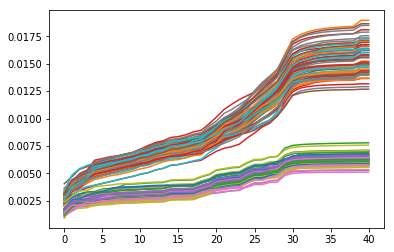

In [10]:
import matplotlib.pyplot as plt
for i in range (60):
    plt.plot(time,results[1]['SD_National Energy System Distribution[LT Heating Grid]'][0][i])
    plt.plot(time,results[1]['SD_National Energy System Distribution[LT Heating Grid]'][1][i])
plt.show

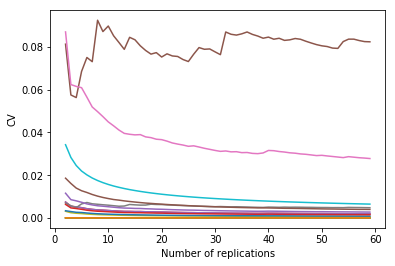

In [33]:
import matplotlib.axes as ax
fig = plt.figure()
for i in results[1].keys():
    for j in range(1):
        plt.plot(get_replication_discriptives(results, i,j,40)['Cv'])

#plt.legend(results[1].keys(),bbox_to_anchor=(1.1, 1.1))
plt.ylabel('CV')
plt.xlabel('Number of replications')

a = plt

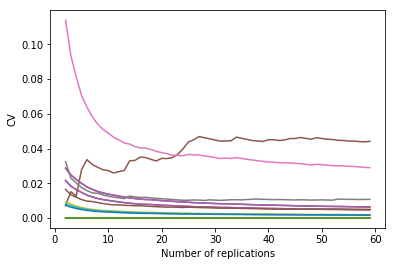

In [29]:
import matplotlib.axes as ax
fig = plt.figure()
for i in results2[1].keys():
    for j in range(1):
        plt.plot(get_replication_discriptives(results2, i,j,40)['Cv'])

#plt.legend(results2[1].keys(),bbox_to_anchor=(1.1, 1.1))
plt.ylabel('CV')
plt.xlabel('Number of replications')

plt.show()

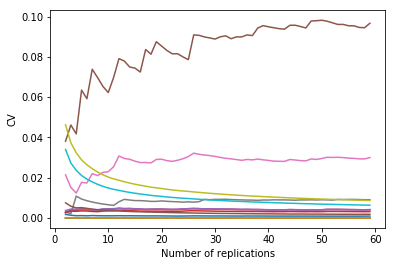

In [30]:
import matplotlib.axes as ax
fig = plt.figure()
for i in results[1].keys():
    for j in range(1,2):
        plt.plot(get_replication_discriptives(results,i,j,40)['Cv'])

#plt.legend(results[1].keys(),bbox_to_anchor=(1.1, 1.1))
plt.ylabel('CV')
plt.xlabel('Number of replications')

plt.show()

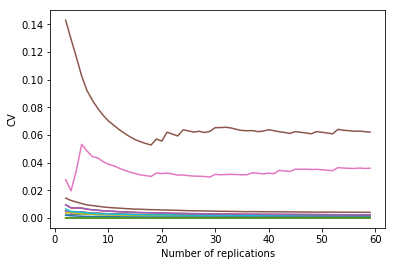

In [31]:
import matplotlib.axes as ax
fig = plt.figure()
for i in results2[1].keys():
    for j in range(1,2):
        plt.plot(get_replication_discriptives(results2,i,j,40)['Cv'])

#plt.legend(results2[1].keys(),bbox_to_anchor=(1.1, 1.1))
plt.ylabel('CV')
plt.xlabel('Number of replications')

plt.show()

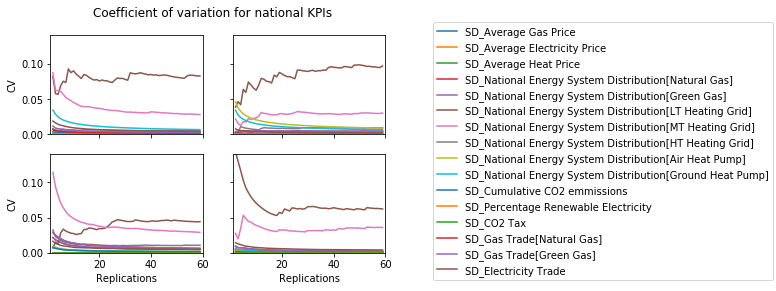

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Coefficient of variation for national KPIs')

for i in results[1].keys():
    ax1.plot(get_replication_discriptives(results, i,0,40)['Cv'])
    ax2.plot(get_replication_discriptives(results, i,1,40)['Cv'])
    ax3.plot(get_replication_discriptives(results2, i,0,40)['Cv'])
    ax4.plot(get_replication_discriptives(results2, i,1,40)['Cv'])
fig.legend(results[1].keys(),bbox_to_anchor=(1.8, 0.95))


for ax in fig.get_axes():
    ax.set_ylabel('CV')
    ax.set_xlabel('Replications')
    ax.set_xlim([1,60])
    ax.set_ylim([0.00,0.14])
    ax.label_outer()
